## Final Project Submission

Please fill out:
* Student name: Andrew J Moy
* Student pace: self paced / part time / full time: Full Time
* Scheduled project review date/time: 
* Instructor name: Rafael Carrasco
* Blog post URL:


In [1]:
from custom_func import *

In [2]:
df= pd.read_csv('/Users/andrewmoy/Documents/Flatiron/Course/dsc-phase-2-project-online/data/kc_house_data.csv')

In [3]:
df['yr_renovated'].fillna(0, inplace=True)
df['view'].fillna(0, inplace=True)
df['waterfront'].fillna(0, inplace=True)
df = df.replace('?',0)
#0 null values

In [4]:
df = df.drop(df.loc[df['price'] > np.mean(df['price']) + (2 * np.std(df['price']))].index)
#removing outliers

In [5]:
#df['price_log'] = df['price'].map(lambda x: np.log(x))
df['sqft_living_log'] = df['sqft_living'].map(lambda x: np.log(x))
df['sqft_living15_log'] = df['sqft_living15'].map(lambda x: np.log(x))
df['sqft_above_log'] = df['sqft_above'].map(lambda x: np.log(x))
#log transformations for normality

In [6]:
df['renovated'] = df['yr_renovated'].map(lambda x: 1 if x > 0 else 0)
renovated_df = df[df['renovated']==1] 
non_renovated_df = df[df['renovated']==0]
df['bed_bath'] = df['bedrooms'] + df['bathrooms']
#add extra features

In [7]:
view_dum = pd.get_dummies(df['view'], prefix='view')
df = pd.concat([df, view_dum], axis=1)
grade_dum = pd.get_dummies(df['grade'], prefix='grade')
df = pd.concat([df, grade_dum], axis=1)
condition_dum = pd.get_dummies(df['condition'], prefix='condition')
df = pd.concat([df, condition_dum], axis=1)
#add dummy values

In [8]:
for col in df.columns:
    print(col)

id
date
price
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
view
condition
grade
sqft_above
sqft_basement
yr_built
yr_renovated
zipcode
lat
long
sqft_living15
sqft_lot15
sqft_living_log
sqft_living15_log
sqft_above_log
renovated
bed_bath
view_0.0
view_1.0
view_2.0
view_3.0
view_4.0
grade_3
grade_4
grade_5
grade_6
grade_7
grade_8
grade_9
grade_10
grade_11
grade_12
condition_1
condition_2
condition_3
condition_4
condition_5


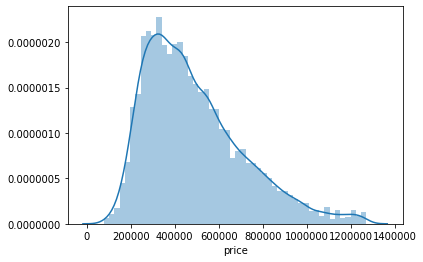

In [9]:
sns.distplot(df.price)

In [10]:
df.to_csv('/Users/andrewmoy/Documents/Flatiron/Course/dsc-phase-2-project-online/clean_data.csv')